In [ ]:
#Scrapping data of list of largest companies in India from wikipedia and analyse it according to their revenue and growth.

In [4]:
import pandas as pd 

In [5]:
from bs4 import BeautifulSoup 
import requests 


In [6]:
url='https://en.wikipedia.org/wiki/List_of_largest_companies_in_India'

page = requests.get(url)

soup= BeautifulSoup(page.text,'html')

In [10]:
table=soup.find_all('table',class_='wikitable sortable')[0]

In [12]:
table.find_all('th')

[<th align="center">Rank
 </th>,
 <th align="center">Name
 </th>,
 <th align="center">Industry
 </th>,
 <th align="center">Revenue<br/>(billions <br/>US$)
 </th>,
 <th align="center">Headquarters
 </th>]

In [13]:
world_list=table.find_all('th')

In [14]:
[title.text.strip() for title in world_list]

['Rank', 'Name', 'Industry', 'Revenue(billions US$)', 'Headquarters']

In [15]:
world_class_title=[title.text.strip() for title in world_list]

In [16]:
df=pd.DataFrame(columns=world_class_title)

In [17]:
df

,Rank,Name,Industry,Revenue(billions US$),Headquarters


In [18]:
column_data=table.find_all('tr')

In [19]:
for row in column_data[1:]:
    row_data=row.find_all('td')
    row_class_data=[data.text.strip() for data in row_data]
    length=len(df)
    df.loc[length]=row_class_data
    
    

    

In [20]:
df

,Rank,Name,Industry,Revenue(billions US$),Headquarters
0,1,Reliance Industries,Conglomerate,109.43,Mumbai
1,2,Indian Oil Corporation,Oil and gas,103.42,New Delhi
2,3,Life Insurance Corporation,Banking,100.35,Mumbai
3,4,Oil and Natural Gas Corporation,Oil and gas,86.06,New Delhi
4,5,Bharat Petroleum,Oil and gas,58.84,Mumbai
5,6,State Bank of India,Banking,56.54,Mumbai
6,4,HDFC Bank,Banking,25.47,Mumbai
7,5,ICICI Bank,Banking,23.17,Mumbai
8,7,HDFC,Financials,19.04,Mumbai
9,9,Tata Consultancy Services,Infotech,27.9,Mumbai


In [21]:
df.to_csv(r'/Users/rahilmanotra/Documents/companies.csv',index= False) 

In [22]:
#finding the duplicate data 
df.duplicated().sum()

0

In [23]:
df.head(10)



,Rank,Name,Industry,Revenue(billions US$),Headquarters
0,1,Reliance Industries,Conglomerate,109.43,Mumbai
1,2,Indian Oil Corporation,Oil and gas,103.42,New Delhi
2,3,Life Insurance Corporation,Banking,100.35,Mumbai
3,4,Oil and Natural Gas Corporation,Oil and gas,86.06,New Delhi
4,5,Bharat Petroleum,Oil and gas,58.84,Mumbai
5,6,State Bank of India,Banking,56.54,Mumbai
6,4,HDFC Bank,Banking,25.47,Mumbai
7,5,ICICI Bank,Banking,23.17,Mumbai
8,7,HDFC,Financials,19.04,Mumbai
9,9,Tata Consultancy Services,Infotech,27.9,Mumbai


In [24]:
df['Headquarters'].value_counts()

Headquarters
Mumbai       24
New Delhi     9
Ahmedabad     5
Bangalore     4
Pune          3
Kolkata       2
Chennai       2
Noida         1
Gurgaon       1
Vadodara      1
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   52 non-null     object
 1   Name                   52 non-null     object
 2   Industry               52 non-null     object
 3   Revenue(billions US$)  52 non-null     object
 4   Headquarters           52 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB


In [26]:
df['Revenue(billions US$)']=df['Revenue(billions US$)'].astype(float)

In [27]:
df['Rank']=df['Rank'].astype(int)

In [28]:
mean=df['Revenue(billions US$)'].mean()

In [29]:
mean

20.83

In [30]:
#Find the name of the companies with highest average revenue$
df.groupby("Name")["Revenue(billions US$)"].mean().sort_values(ascending=False)

Name
Reliance Industries                   109.43
Indian Oil Corporation                103.42
Life Insurance Corporation            100.35
Oil and Natural Gas Corporation        86.06
Bharat Petroleum                       58.84
State Bank of India                    56.54
Tata Motors                            39.04
Tata Steel                             30.28
Rajesh Exports                         30.00
Tata Consultancy Services              27.90
HDFC Bank                              25.47
Hindalco Industries                    24.33
ICICI Bank                             23.17
Larsen & Toubro                        22.62
NTPC Limited                           21.25
HDFC                                   19.04
Infosys                                18.26
Bharti Airtel                          17.12
Vedanta Limited                        16.38
Coal India                             14.03
Axis Bank                              13.21
Steel Authority of India               12.98
Canar

In [31]:
#find the name of the company with highest revenue$
df.nlargest(5,"Revenue(billions US$)")[["Name","Revenue(billions US$)"]]

,Name,Revenue(billions US$)
0,Reliance Industries,109.43
1,Indian Oil Corporation,103.42
2,Life Insurance Corporation,100.35
3,Oil and Natural Gas Corporation,86.06
4,Bharat Petroleum,58.84


In [32]:
df.head()

,Rank,Name,Industry,Revenue(billions US$),Headquarters
0,1,Reliance Industries,Conglomerate,109.43,Mumbai
1,2,Indian Oil Corporation,Oil and gas,103.42,New Delhi
2,3,Life Insurance Corporation,Banking,100.35,Mumbai
3,4,Oil and Natural Gas Corporation,Oil and gas,86.06,New Delhi
4,5,Bharat Petroleum,Oil and gas,58.84,Mumbai


In [33]:
#found the largest revenue in oil and gas 
oil=df[df['Industry']=='Oil and gas']

In [34]:
oil.max()


Rank                                                  49
Name                     Oil and Natural Gas Corporation
Industry                                     Oil and gas
Revenue(billions US$)                             103.42
Headquarters                                   New Delhi
dtype: object

In [35]:
oil

,Rank,Name,Industry,Revenue(billions US$),Headquarters
1,2,Indian Oil Corporation,Oil and gas,103.42,New Delhi
3,4,Oil and Natural Gas Corporation,Oil and gas,86.06,New Delhi
4,5,Bharat Petroleum,Oil and gas,58.84,Mumbai
35,36,GAIL,Oil and gas,10.98,New Delhi
48,49,Adani Total Gas,Oil and gas,0.35,Ahmedabad


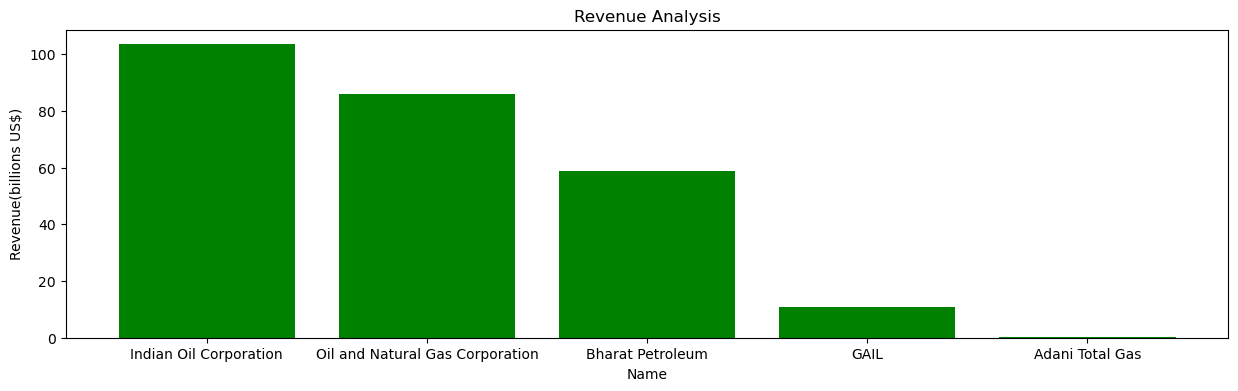

In [36]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.bar(oil['Name'],oil['Revenue(billions US$)'],color='green')
plt.title('Revenue Analysis')
plt.xlabel('Name')
plt.ylabel('Revenue(billions US$)')

plt.show()
        
        

In [37]:
#total number of industries 
industries_total= df['Industry'].value_counts()

In [38]:
industries_total

Industry
Banking               13
Infotech               5
Oil and gas            5
Financials             4
Iron and steel         3
Utilities              3
Metals and mining      3
Automotive             3
Retail                 2
Consumer Goods         2
Shipping               1
Chemicals              1
Gems and jewellery     1
Renewable energy       1
Conglomerate           1
Pharmaceuticals        1
Diversified            1
Capital goods          1
Telecommunication      1
Name: count, dtype: int64

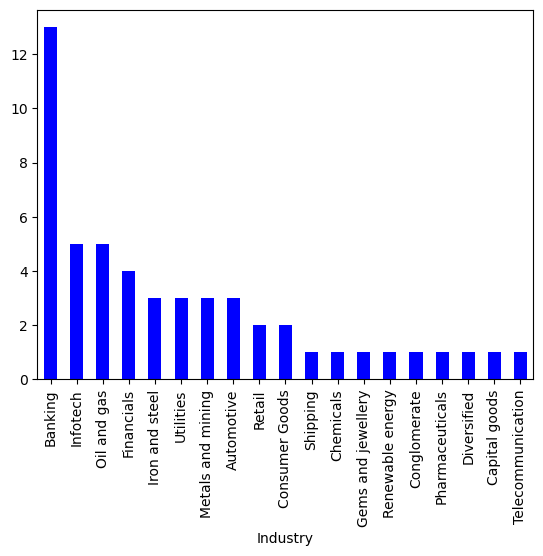

In [39]:
#Graphical representation of sector which has highest revenue
industries_total.plot(kind='bar',color='blue')
plt.xlabel=('INDUSTRIES')
plt.ylabel=('TOTAL')
plt.title=('Particular Sectors')
plt.show()

In [40]:
Bank=df[df['Industry']=='Banking']

In [41]:
Bank

,Rank,Name,Industry,Revenue(billions US$),Headquarters
2,3,Life Insurance Corporation,Banking,100.35,Mumbai
5,6,State Bank of India,Banking,56.54,Mumbai
6,4,HDFC Bank,Banking,25.47,Mumbai
7,5,ICICI Bank,Banking,23.17,Mumbai
11,11,Axis Bank,Banking,13.21,Mumbai
17,18,Kotak Mahindra Bank,Banking,7.92,Mumbai
29,30,Canara Bank,Banking,12.68,Bangalore
30,31,Bank of Baroda,Banking,12.06,Vadodara
31,32,Union Bank of India,Banking,11.28,Mumbai
32,33,Punjab National Bank,Banking,12.10,New Delhi


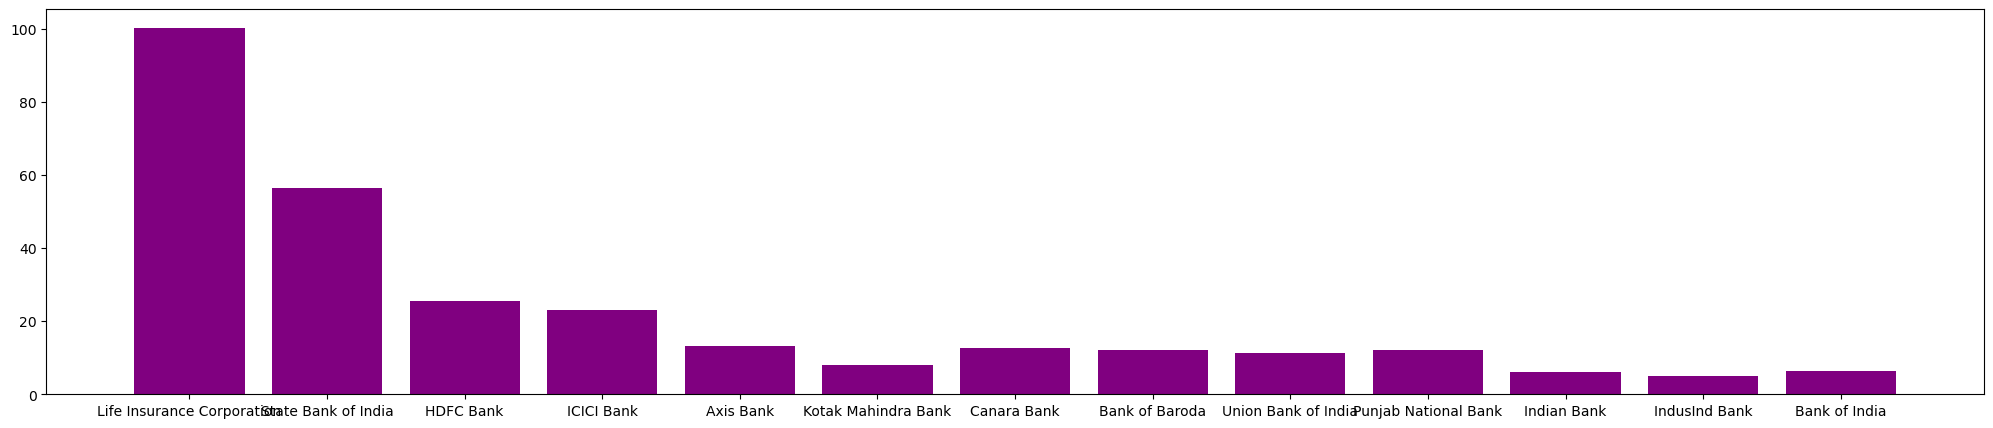

In [45]:
#Represenation of Bank which have highest revenue 
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.bar(Bank['Name'],Bank['Revenue(billions US$)'],color='purple')


plt.show()



                        
                       

In [46]:
df

,Rank,Name,Industry,Revenue(billions US$),Headquarters
0,1,Reliance Industries,Conglomerate,109.43,Mumbai
1,2,Indian Oil Corporation,Oil and gas,103.42,New Delhi
2,3,Life Insurance Corporation,Banking,100.35,Mumbai
3,4,Oil and Natural Gas Corporation,Oil and gas,86.06,New Delhi
4,5,Bharat Petroleum,Oil and gas,58.84,Mumbai
5,6,State Bank of India,Banking,56.54,Mumbai
6,4,HDFC Bank,Banking,25.47,Mumbai
7,5,ICICI Bank,Banking,23.17,Mumbai
8,7,HDFC,Financials,19.04,Mumbai
9,9,Tata Consultancy Services,Infotech,27.90,Mumbai


In [47]:
#No of companies according to geographical area 
City=df['Headquarters'].value_counts()


In [48]:
City

Headquarters
Mumbai       24
New Delhi     9
Ahmedabad     5
Bangalore     4
Pune          3
Kolkata       2
Chennai       2
Noida         1
Gurgaon       1
Vadodara      1
Name: count, dtype: int64

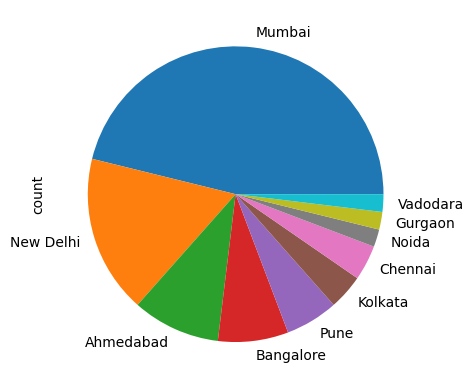

In [58]:
City.plot(kind='pie')
plt.show()